In [1]:
# Dependencies 

import hvplot.pandas
import pandas as pd
import requests
import time
import json
from scipy.stats import linregress
from matplotlib import pyplot as plt


In [2]:
# read csv 
data_df = pd.read_csv('athlete_events.csv')
data_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Total Medals Won vs Type of Medals Won

In [3]:
# create a DataFrame of Team USA
usa_df = data_df.loc[data_df['Team'] == 'United States']
usa_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270850,135458,Rami Zur,M,27.0,175.0,77.0,United States,USA,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN
270851,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN
270852,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",NaN
271044,135543,"Victor Andrew ""Vic"" Zwolak",M,25.0,175.0,64.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN


In [4]:
# create DataFrame for Total Medal Count
count_by_type = usa_df.groupby('Medal').size()
count_by_type

Medal
Bronze    1233
Gold      2474
Silver    1512
dtype: int64

In [5]:
# create list 
medals = [1233,1512,2474]
# define specific medal to pull 
us_bronze = 1233
for value in medals:
    if value == us_bronze:
        print(f'The total number of Bronze Medals won by the United States is {us_bronze}.')
us_silver = 1512
for value in medals:
    if value == us_silver:
        print(f'The total number of Silver Medals won by the United States is {us_silver}.')
us_gold = 2474
for value in medals:
    if value == us_gold:
        print(f'The total number of Gold Medals won by the United States is {us_gold}.')

The total number of Bronze Medals won by the United States is 1233.
The total number of Silver Medals won by the United States is 1512.
The total number of Gold Medals won by the United States is 2474.


In [6]:
# calulate total medals won by Team USA 
total_medals = us_bronze + us_silver + us_gold 
print(f'The total number of medals won by the United States is {total_medals}.')

The total number of medals won by the United States is 5219.


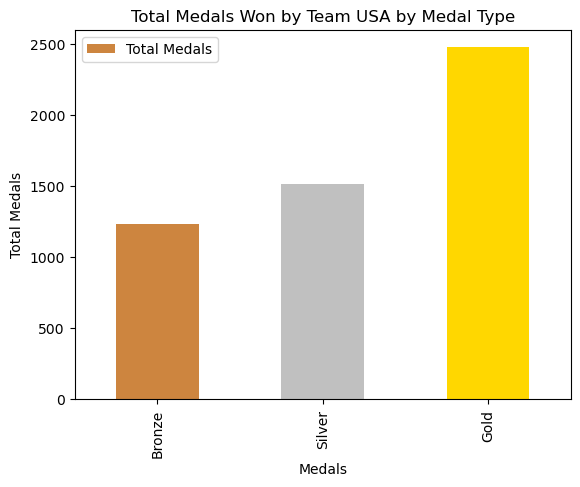

In [7]:
# bar graph
total_medals_bar = {'Medals': ['Bronze', 'Silver', 'Gold'], 'Total Medals': [1233,1512,2474]}
total_medals_bar_df = pd.DataFrame(total_medals_bar)

total_medals_bar_df.plot(kind='bar', color=['peru','silver','gold'], x='Medals', y='Total Medals', title='Total Medals Won by Team USA by Medal Type')
plt.xlabel('Medals')
plt.ylabel('Total Medals')

plt.savefig('total_medals_by_type_bar_chart.png')
plt.show()

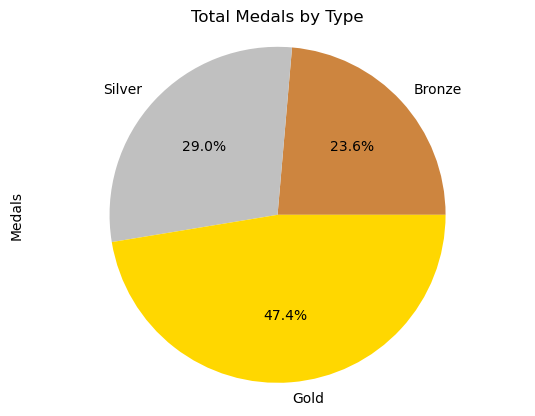

In [8]:
# pie chart
data = {'Medals': [1233, 1512, 2474]}
index = ['Bronze', 'Silver', 'Gold']
total_medals_pie = pd.DataFrame(data, index=index)
colors = ['peru','silver','gold']



total_medals_pie.plot(kind='pie', y='Medals', autopct='%1.1f%%', legend=False, colors=colors, title='Total Medals by Type')
plt.axis('equal')
plt.savefig('total_medals_pie_chart.png')

## Top 5 Athletes Based on Medals (Women)

In [9]:
# create DataFrame for Female Athletes
women_df = data_df.loc[data_df['Sex'] == 'F']
cleaned_women_df = women_df.dropna()
cleaned_women_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver
286,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271076,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [10]:
# calculate total medals by athlete and the team they are competing with
women_country_total_medals = cleaned_women_df.groupby(['Name', 'Team'])['Medal'].count().reset_index()
women_country_total_medals.columns = ['Name', 'Team', 'Total Medals']
women_country_total_medals

,Name,Team,Total Medals
0,"Aagje ""Ada"" Kok (-van der Linden)",Netherlands,3
1,"Aartje Elisabeth ""Adrie"" Lasterie",Netherlands,1
2,Abbey Weitzeil,United States,2
3,Abby Bishop,Australia,1
4,"Abigail Louise ""Abby"" Johnston",United States,1
...,...,...,...
6899,va Csernoviczki,Hungary,1
6900,va Dnusz,Hungary,2
6901,va Erds,Hungary,1
6902,va Rakusz,Hungary,2


In [11]:
# sort from most to least
women_total_medals_sorted = women_country_total_medals.sort_values(by='Total Medals', ascending=False)
women_total_medals_sorted.head()

,Name,Team,Total Medals
3347,Larysa Semenivna Latynina (Diriy-),Soviet Union,18
4625,Natalie Anne Coughlin (-Hall),United States,12
1301,"Dara Grace Torres (-Hoffman, -Minas)",United States,12
2625,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",United States,12
6382,Vra slavsk (-Odloilov),Czechoslovakia,11


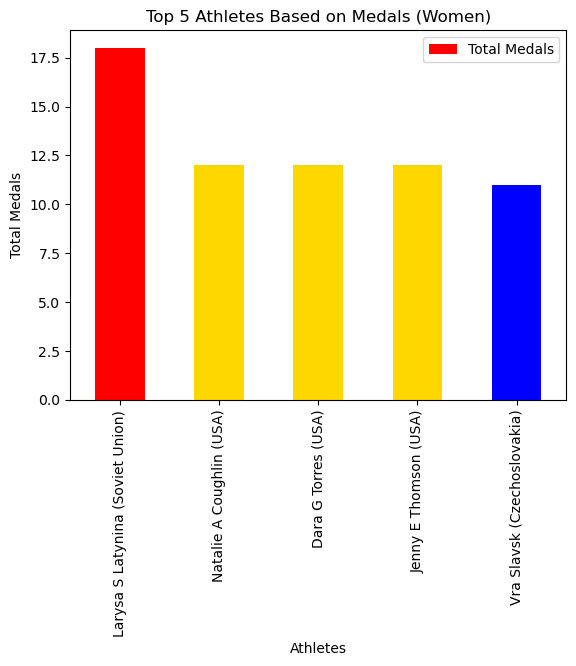

In [12]:
# bar graph
top_women_bar = {'Athletes': ['Larysa S Latynina (Soviet Union)', 'Natalie A Coughlin (USA)', 'Dara G Torres (USA)','Jenny E Thomson (USA)','Vra Slavsk (Czechoslovakia)'], 'Total Medals': [18,12,12,12,11]}
top_women_bar_df = pd.DataFrame(top_women_bar)

top_women_bar_df.plot(kind='bar', color=['red','gold','gold','gold','blue'], x='Athletes', y='Total Medals', title='Top 5 Athletes Based on Medals (Women)')
plt.xlabel('Athletes')
plt.ylabel('Total Medals')

plt.savefig('top_5_women.png')
plt.show()



## Top 5 Athletes Based on Medals (Men)

In [13]:
# create DataFrame for Male Athletes
men_df = data_df.loc[data_df['Sex'] == 'M']
cleaned_men_df = men_df.dropna()
cleaned_men_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271019,135525,Martin Zwicker,M,29.0,175.0,64.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Hockey,Hockey Men's Hockey,Bronze
271046,135544,Krzysztof Zwoliski,M,21.0,175.0,70.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 4 x 100 metres Relay,Silver
271048,135545,Henk Jan Zwolle,M,27.0,197.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold


In [14]:
# calculate total medals by athlete and the team they are competing with
men_country_total_medals = cleaned_men_df.groupby(['Name', 'Team'])['Medal'].count().reset_index()
men_country_total_medals.columns = ['Name', 'Team', 'Total Medals']
men_country_total_medals

,Name,Team,Total Medals
0,"A. Joshua ""Josh"" West",Great Britain,1
1,Aage Birch,Denmark,1
2,Aaron Brown,Canada,1
3,Aaron Egbele,Nigeria,1
4,Aaron Gate,New Zealand,1
...,...,...,...
14292,udovt Cvetler,Czechoslovakia,1
14293,ukasz Zygmunt Pawowski,Poland,1
14294,ula Meter,Serbia and Montenegro,2
14295,ver Maximiliano David Banega,Argentina,1


In [15]:
# sort from most to least
men_total_medals_sorted = men_country_total_medals.sort_values(by='Total Medals', ascending=False)
men_total_medals_sorted.head()

,Name,Team,Total Medals
8748,"Michael Fred Phelps, II",United States,28
9417,Nikolay Yefimovich Andrianov,Soviet Union,15
12164,Takashi Ono,Japan,13
1630,Borys Anfiyanovych Shakhlin,Soviet Union,13
9549,Ole Einar Bjrndalen,Norway,13


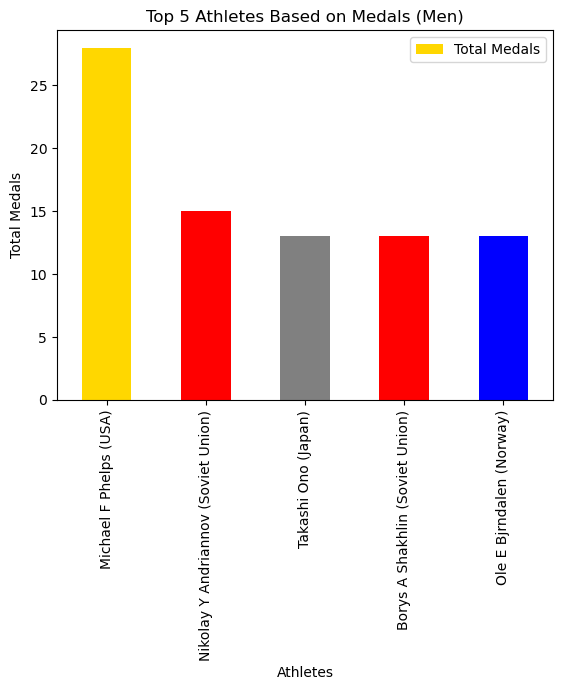

In [16]:
# bar graph
top_men_bar = {'Athletes': ['Michael F Phelps (USA)','Nikolay Y Andriannov (Soviet Union)','Takashi Ono (Japan)','Borys A Shakhlin (Soviet Union)','Ole E Bjrndalen (Norway)'], 'Total Medals': [28,15,13,13,13]}
top_men_bar_df = pd.DataFrame(top_men_bar)

top_men_bar_df.plot(kind='bar', color=['gold','red','gray','red','blue'], x='Athletes', y='Total Medals', title='Top 5 Athletes Based on Medals (Men)')
plt.xlabel('Athletes')
plt.ylabel('Total Medals')

plt.savefig('top_5_men.png')
plt.show()


## What is the most dominant sport for Team USA? (Most Medals)

In [17]:
# calculate total medals by sport
most_dominant_sport = usa_df.groupby(['Sport'])['Medal'].count().reset_index()
most_dominant_sport.columns = ['Sport', 'Total Medals']
most_dominant_sport

,Sport,Total Medals
0,Alpine Skiing,44
1,Archery,41
2,Art Competitions,9
3,Athletics,1071
4,Badminton,0
5,Baseball,68
6,Basketball,341
7,Biathlon,0
8,Boxing,113
9,Canoeing,19


In [18]:
# sort values
most_dominant_sport_sorted = most_dominant_sport.sort_values(by='Total Medals', ascending=False)
most_dominant_sport_sorted.head()

,Sport,Total Medals
3,Athletics,1071
43,Swimming,1066
6,Basketball,341
32,Rowing,333
23,Ice Hockey,276


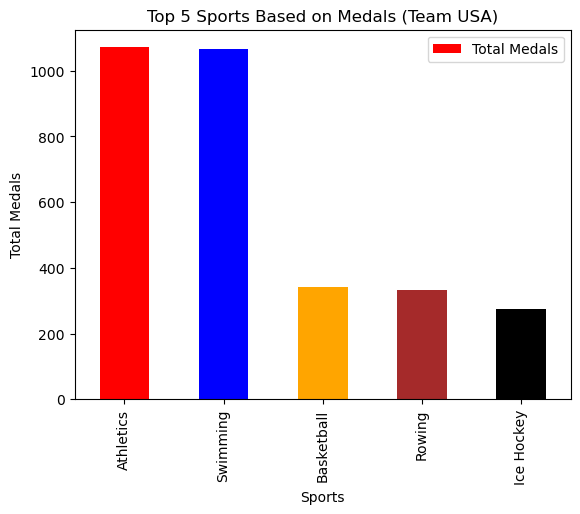

In [19]:
# bar graph
top_sport_usa_bar = {'Sports': ['Athletics','Swimming','Basketball','Rowing','Ice Hockey'], 'Total Medals': [1071,1066,341,333,276]}
top_sport_usa_bar_df = pd.DataFrame(top_sport_usa_bar)

top_sport_usa_bar_df.plot(kind='bar', color=['red','blue','orange','brown','black'], x='Sports', y='Total Medals', title='Top 5 Sports Based on Medals (Team USA)')
plt.xlabel('Sports')
plt.ylabel('Total Medals')

plt.savefig('top_5_usa_sports.png')
plt.show()


## Which country has the most medals of all time? 

In [20]:
# calculate total medals by country
most_dominant_country = data_df.groupby(['Team'])['Medal'].count().reset_index()
most_dominant_country.columns = ['Team', 'Total Medals']
most_dominant_country

,Team,Total Medals
0,30. Februar,0
1,A North American Team,4
2,Acipactli,0
3,Acturus,0
4,Afghanistan,2
...,...,...
1179,Zambia,2
1180,Zefyros,0
1181,Zimbabwe,22
1182,Zut,3


In [21]:
# sort values
most_dominant_country_sorted = most_dominant_country.sort_values(by='Total Medals', ascending=False)
most_dominant_country_sorted.head()

,Team,Total Medals
1095,United States,5219
976,Soviet Union,2451
398,Germany,1984
412,Great Britain,1673
361,France,1550


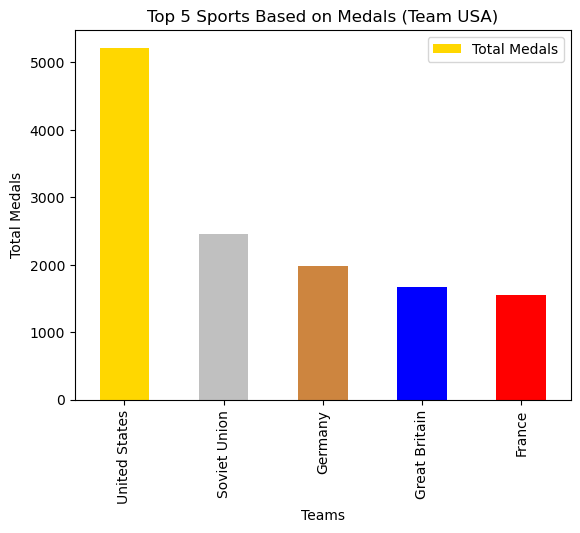

In [22]:
# bar graph
top_country_bar = {'Teams': ['United States','Soviet Union','Germany','Great Britain','France'], 'Total Medals': [5219,2451,1984,1673,1550]}
top_country_bar_df = pd.DataFrame(top_country_bar)

top_country_bar_df.plot(kind='bar', color=['gold','silver','peru','blue','red'], x='Teams', y='Total Medals', title='Top 5 Sports Based on Medals (Team USA)')
plt.xlabel('Teams')
plt.ylabel('Total Medals')

plt.savefig('top_5_teams.png')
plt.show()
